## Segmentation Analysis

Segmentation analysis is a critical technique used in various industries, including marketing, retail, and customer relationship management (CRM), to identify distinct groups within a broader population. By dividing a larger market or customer base into smaller segments that share common characteristics, businesses can better tailor their strategies and offerings to meet the specific needs and preferences of different customer groups. This personalized approach can enhance customer satisfaction, increase loyalty, and drive growth.

Key Steps in Segmentation Analysis:
1. Data Collection: Gather relevant data about your customers or market. This can include demographic information (age, gender, income), geographic data (location), psychographic details (lifestyle, values), and behavioral data (purchase history, brand loyalty).
2. Data Preprocessing: Clean and preprocess the data to handle missing values, normalize numerical features, and encode categorical variables.
3. Feature Selection: Choose the features that are most relevant to the segmentation goals.
4. Clustering Algorithm: This project using K-Means Clustering.
5. Determine Optimal Number of Clusters: This project using the Elbow Method and Silhouette Score techniques.
6. Interpretation and Profiling: Analyze the characteristics of each segment to understand their unique traits and behaviors. 
7. Actionable Insights: Use the segment profiles to inform business strategies, such as targeted marketing campaigns, personalized product recommendations, or tailored customer service approaches.

Example Use Case:
In a retail context, segmentation analysis can help identify different customer groups based on their purchasing behavior. For instance, one segment might consist of high-spending customers who frequently buy electronics and furniture, while another segment might include budget-conscious shoppers who mainly purchase small office supplies. By understanding these segments, a retailer can create targeted promotions, optimize inventory management, and enhance customer retention.

Benefits of Segmentation Analysis:
- Improved Customer Understanding: Gain deeper insights into the diverse needs and preferences of different customer groups.
- Enhanced Marketing Efficiency: Allocate marketing resources more effectively by targeting specific segments with tailored messages and offers.
- Increased Customer Satisfaction: Deliver personalized experiences that resonate with each customer segment, leading to higher satisfaction and loyalty.
- Competitive Advantage: Differentiate your business by meeting the unique needs of various customer segments better than competitors.

In summary, segmentation analysis is a powerful tool that enables businesses to break down their market or customer base into manageable and actionable segments. By doing so, businesses can develop more precise and effective strategies, ultimately leading to better outcomes and growth.

In [29]:
# Importing libraries

!pip install yellowbrick
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn import metrics 
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Load dataset

df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Data info

print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")
df.info()

Number of column :17
Number of rows :1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-nul

### Data Cleaning

In [8]:
# Missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
# Data duplicate
df.duplicated().sum()

0

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [18]:
df.describe(exclude=np.number)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [59]:
# Drop columns that not usefull
df_cleaned = df.drop(columns=['Invoice ID'], axis=1)
df_cleaned.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### K-Means Clustering

In [61]:
# Checking the categorical variables
data_categorical = (df_cleaned.dtypes == 'object')
data_categorical_objects = list(data_categorical[data_categorical].index)
print(f'The categorical variables:\n  {data_categorical_objects}')

The categorical variables:
  ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [62]:
# Make a copy
df_copy = df_cleaned.copy()

# Apply Ordinal Encoder 
ordinal_encoder = OrdinalEncoder()
df_copy[data_categorical_objects] = ordinal_encoder.fit_transform(df_copy[data_categorical_objects])
df_copy.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0.0,2.0,0.0,0.0,3.0,74.69,7,26.1415,548.9715,26.0,146.0,2.0,522.83,4.761905,26.1415,9.1
1,2.0,1.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,87.0,23.0,0.0,76.40,4.761905,3.8200,9.6
2,0.0,2.0,1.0,1.0,4.0,46.33,7,16.2155,340.5255,81.0,155.0,1.0,324.31,4.761905,16.2155,7.4
3,0.0,2.0,0.0,1.0,3.0,58.22,8,23.2880,489.0480,19.0,485.0,2.0,465.76,4.761905,23.2880,8.4
4,0.0,2.0,1.0,1.0,5.0,86.31,7,30.2085,634.3785,57.0,29.0,2.0,604.17,4.761905,30.2085,5.3


In [26]:
# Normalize data
df_norm = Normalizer().fit_transform(df_copy.values)
df_norm

array([[0.        , 0.00257379, 0.        , ..., 0.00612807, 0.03364134,
        0.01171073],
       [0.01387461, 0.0069373 , 0.0069373 , ..., 0.03303478, 0.0265005 ,
        0.06659812],
       [0.        , 0.00396415, 0.00198207, ..., 0.00943845, 0.03214033,
        0.01466735],
       ...,
       [0.        , 0.01148547, 0.        , ..., 0.02734636, 0.00914244,
        0.04421907],
       [0.        , 0.00691421, 0.0034571 , ..., 0.0164624 , 0.01137733,
        0.01417413],
       [0.        , 0.00218086, 0.        , ..., 0.00519251, 0.03371495,
        0.00719683]])

In [ ]:
# Training model
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
model = kmeans.fit_predict(df_norm)

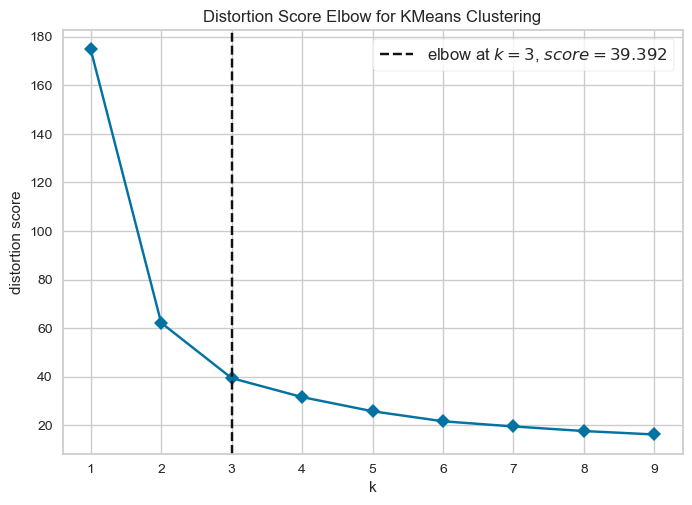

The optimal number of clusters based on the Elbow Method: 3


In [69]:
# Elbow visualizer
visualizer = KElbowVisualizer(kmeans, k=(1,10), timings=False)
visualizer.fit(df_norm)
visualizer.show()

# Mendapatkan nilai elbow
optimal_clusters = visualizer.elbow_value_
print(f"The optimal number of clusters based on the Elbow Method: {optimal_clusters}")

### Validation

In [70]:
# Apply silhouette metric
silhouette = metrics.silhouette_score(df_norm,model,metric='euclidean')
print(silhouette)

0.4609633573320872


The Silhouette score ranges from -1 to 1, with the following interpretations:

- A score close to 1 indicates that the clusters are well-defined, with data points close to their own cluster center and far from other clusters.
- A score around 0 indicates that data points are on or very close to the decision boundary between two clusters, making it unclear which cluster they belong to.
- A score close to -1 suggests that data points might have been assigned to the wrong cluster.

**Conclusion**: The clustering result is moderately good. This score indicates that most of the data points are reasonably close to their cluster centers, but there are some data points that might be near the boundaries between clusters.

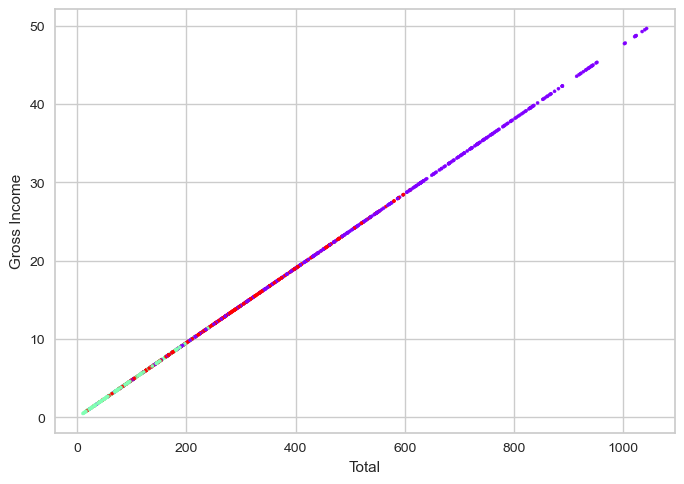

In [65]:
plt.scatter(df_copy["Total"],df_copy["gross income"], c=model, s=5, cmap='rainbow')
plt.xlabel("Total")
plt.ylabel("Gross Income")
plt.show()

To gain insights from the data and identify which variables have strong characteristics, we can calculate the variance of the centroids and select the variables with the highest percentage.

In [73]:
df_copy["Cluster"] = model

In [74]:
centroids = kmeans.cluster_centers_
max = len(centroids[0])
for i in range(max):
    print(df_copy.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

Branch 
0.0000
City 
0.0000
Customer type 
0.0000
Gender 
0.0000
Product line 
0.0000
Unit price 
0.0112
Quantity 
0.0000
Tax 5% 
0.0001
Total 
0.0306
Date 
0.0216
Time 
0.0848
Payment 
0.0000
cogs 
0.0278
gross margin percentage 
0.0001
gross income 
0.0001
Rating 
0.0002


**Conclusion**: Based on the output above, it can be seen that the variance difference is very small. In this project, I used the variables Total, Unit Price, and Gross Income to identify the types of consumers in their shopping behavior.

In [75]:
## Create a segmentation with the variabes

description = df_copy.groupby('Cluster')['Total','Unit price','gross income']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12556\3559179147.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df_copy.groupby('Cluster')['Total','Unit price','gross income']


,Total,Unit price,gross income,n_clients
Cluster,,,,
0,497.658570,67.503302,23.698027,424
1,100.879054,37.730386,4.803764,259
2,270.762904,54.506498,12.893472,317


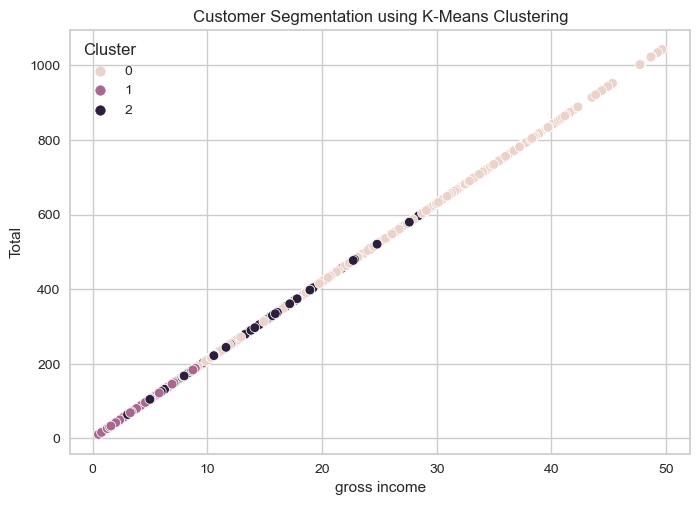

In [58]:
# visualize the clusters
sns.scatterplot(data=df_copy, x="gross income", y="Total", hue="Cluster")
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()

**Conclusion**:
- Cluster 0: The highest total purchases are accompanied by the most expensive unit prices. Due to the highest unit price, the gross income is also the highest compared to other clusters. The conclusion drawn is that items with expensive prices are highly favored by customers, with a total of 424 customers, resulting in a large gross income.

- Cluster 1: With cheap unit prices, total sales and gross income are also low. Customers purchasing these inexpensive items are the least compared to other clusters, indicating that customers are less interested in cheap items.

- Cluster 2: Cluster 2 is the cluster with consumer behavior in the middle Cluster 0 and Cluster 1.

From these conclusions, the recommendation that can be given to the company is to conduct quality checks on items with low prices to attract customers to purchase. For items with prices above average, the company can conduct promotions and ensure product quality to keep customers interested in purchasing items from this company.